In [3]:
#Instalando a biblioteca
!pip install scikit-learn joblib

In [4]:
#Importando as classes que iremos trabalhar
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score
import pandas as pd
import matplotlib.pyplot as plt

In [16]:
base_risco_infarto = pd.read_csv('BASE_Pronta.csv', sep=';')

In [17]:
base_risco_infarto

,INFARTADO,G_Etario,IDADE,QT_TEMP_ALT,ACIMA_PESO,DOENCA_CARDIO,DOENCA_PULMONAR,DOENCA_DIABETES,CIRURG_CARDIACA
0,0,Idoso,93,0,1,1,0,0,0
1,0,Idoso,93,1,1,1,0,0,0
2,0,Adulto,43,0,1,1,0,1,0
3,0,Idoso,71,0,1,0,1,0,0
4,0,Idoso,88,1,1,1,0,1,1
...,...,...,...,...,...,...,...,...,...
1098,0,Idoso,81,1,1,1,1,1,1
1099,0,Idoso,67,1,1,1,0,1,0
1100,0,Idoso,94,0,1,1,0,0,0
1101,0,Adulto,45,0,1,0,0,0,0


In [18]:
# Substituir 0 por 'Sem Risco' e 1 por 'Com Risco' na coluna 'infartado'
base_risco_infarto['INFARTADO'] = base_risco_infarto['INFARTADO'].replace({0: 'Sem Risco', 1: 'Com Risco'})

In [19]:
x_risco_infarto = base_risco_infarto.iloc[:, 1:11].values

y_risco_infarto = base_risco_infarto.iloc[:, 0].values

In [20]:
from sklearn.preprocessing import LabelEncoder
label_encoder_getario = LabelEncoder()
label_encoder_sexo = LabelEncoder()

In [21]:
x_risco_infarto[:,0] = label_encoder_getario.fit_transform(x_risco_infarto[:,0])
x_risco_infarto[:,1] = label_encoder_sexo.fit_transform(x_risco_infarto[:,1])

In [22]:
arvore_rico_infarto = DecisionTreeClassifier(criterion ='entropy')
arvore_rico_infarto.fit(x_risco_infarto, y_risco_infarto)
arvore_rico_infarto.feature_importances_

array([0.        , 0.61849812, 0.05391423, 0.13932522, 0.00674984,
       0.06397078, 0.06260625, 0.05493556])

[Text(0.43146929824561403, 0.9642857142857143, 'faixa_etaria <= 48.5\nentropy = 0.146\nsamples = 1103\nvalue = [23, 1080]\nclass = Sem Risco'),
 Text(0.10025062656641603, 0.8928571428571429, 'faixa_etaria <= 43.5\nentropy = 0.067\nsamples = 498\nvalue = [4, 494]\nclass = Sem Risco'),
 Text(0.08020050125313283, 0.8214285714285714, 'faixa_etaria <= 28.5\nentropy = 0.093\nsamples = 338\nvalue = [4, 334]\nclass = Sem Risco'),
 Text(0.06015037593984962, 0.75, 'entropy = 0.0\nsamples = 125\nvalue = [0, 125]\nclass = Sem Risco'),
 Text(0.10025062656641603, 0.75, 'faixa_etaria <= 29.5\nentropy = 0.135\nsamples = 213\nvalue = [4, 209]\nclass = Sem Risco'),
 Text(0.06015037593984962, 0.6785714285714286, 'acima_peso <= 0.5\nentropy = 0.918\nsamples = 6\nvalue = [2, 4]\nclass = Sem Risco'),
 Text(0.040100250626566414, 0.6071428571428571, 'temperatura <= 0.5\nentropy = 0.918\nsamples = 3\nvalue = [2, 1]\nclass = Com Risco'),
 Text(0.020050125313283207, 0.5357142857142857, 'entropy = 1.0\nsamples = 

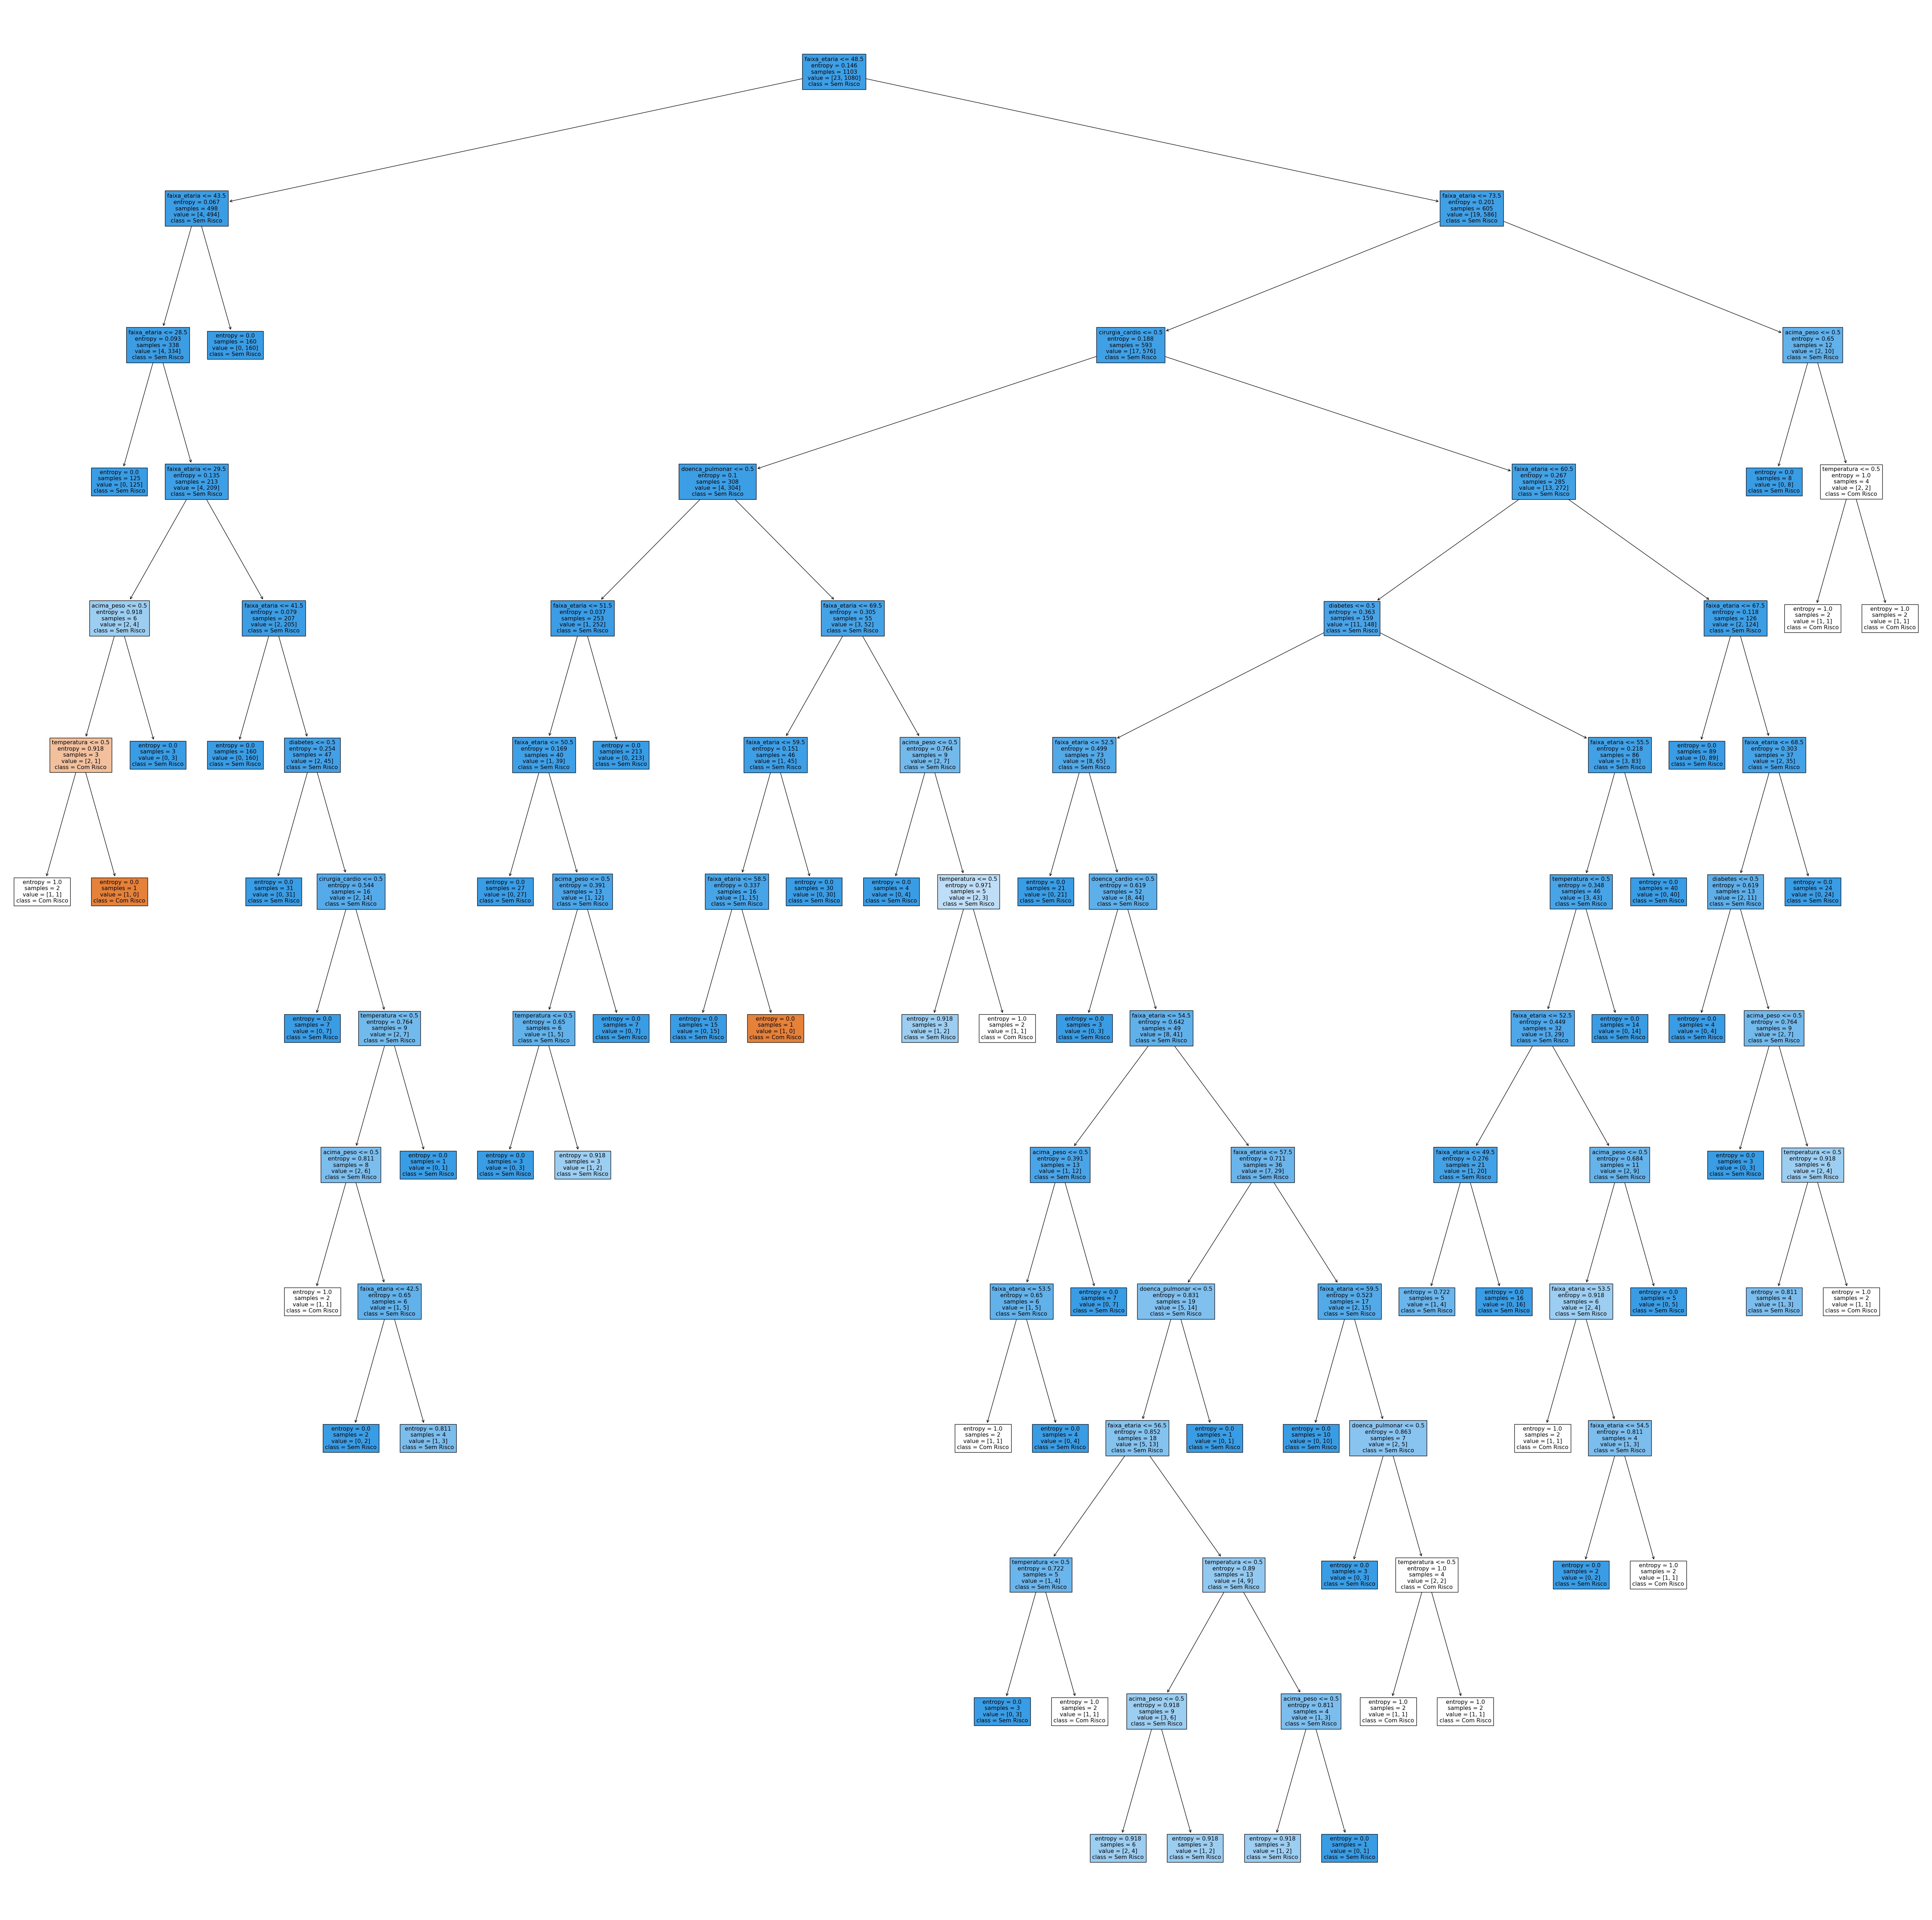

In [23]:
from sklearn import tree
previsores = ['infarto','faixa_etaria','temperatura','acima_peso','doenca_cardio','doenca_pulmonar','diabetes','cirurgia_cardio','cirur_30','Atividade_Fisica']
figura, eixos = plt.subplots(nrows=1, ncols=1, figsize=(70,70))
tree.plot_tree(arvore_rico_infarto, feature_names=previsores, class_names = arvore_rico_infarto.classes_, filled = True)

In [24]:
previsoes = arvore_rico_infarto.predict(x_risco_infarto)

# Calcular a acurácia
acuracia = accuracy_score(y_risco_infarto, previsoes)
print(f'A acurácia do modelo é: {acuracia}')

A acurácia do modelo é: 0.9809610154125114
